In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df=pd.read_csv("../Dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [315]:
df.drop(columns=["RowNumber","CustomerId","Surname","CreditScore"],inplace=True)

In [316]:
df.head(3)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [317]:
def gender(x):
    if x=="Female":
        return 0
    else:
        return 1

In [318]:
df.Gender=df.Gender.apply(gender)

In [319]:
df.head(2)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,0,42,2,0.00,1,1,1,101348.88,1
1,Spain,0,41,1,83807.86,1,0,1,112542.58,0


In [320]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
standard=StandardScaler()
df.Geography=encoder.fit_transform(df.Geography)
df.EstimatedSalary=standard.fit_transform(df[["EstimatedSalary"]])

In [321]:
df.head(2)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,42,2,0.00,1,1,1,0.021886,1
1,2,0,41,1,83807.86,1,0,1,0.216534,0


<Axes: >

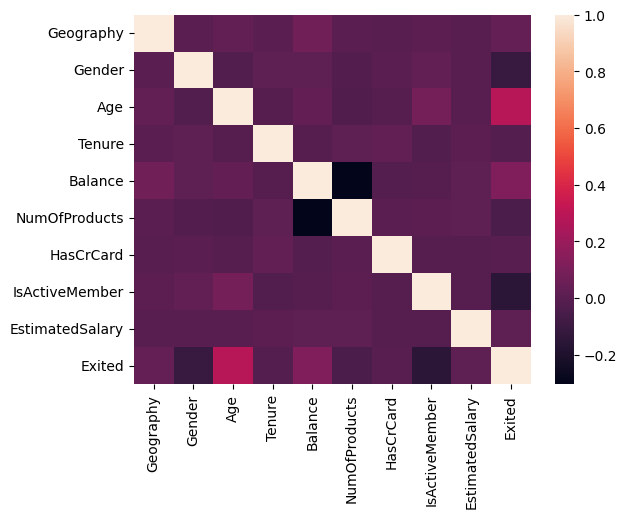

In [322]:
sns.heatmap(df.corr())

In [323]:
X=df.drop(columns=["Exited"])
Y=df[["Exited"]]

<BarContainer object of 2 artists>

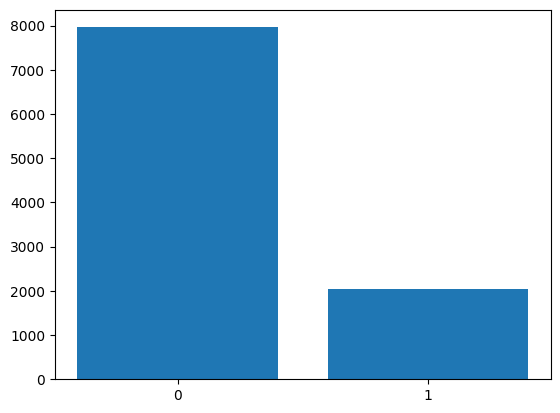

In [324]:
plt.bar(height=Y.Exited.value_counts(),x=["0","1"])

In [325]:
X=df.drop(columns=["Exited"]).to_numpy()
Y=df[["Exited"]].to_numpy()

In [326]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [327]:
x_train

array([[ 0.        ,  1.        , 55.        , ...,  1.        ,
         0.        , -0.61726031],
       [ 0.        ,  0.        , 47.        , ...,  1.        ,
         0.        , -0.64084154],
       [ 1.        ,  1.        , 36.        , ...,  0.        ,
         0.        ,  1.4253597 ],
       ...,
       [ 2.        ,  1.        , 39.        , ...,  1.        ,
         0.        , -1.40295275],
       [ 1.        ,  1.        , 35.        , ...,  1.        ,
         1.        , -0.29627744],
       [ 0.        ,  1.        , 43.        , ...,  1.        ,
         0.        , -1.16668631]])

In [328]:
import tensorflow as tf

In [329]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[x_train.shape[1]]))
model.add(tf.keras.layers.Dense(70,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [330]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 70)             │           770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 100)            │         7,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,071 (51.06 KB)

 Trainable params: 13,071 (51.06 KB)

 Non-trainable params: 0 (0.00 B)

In [331]:
model.compile(optimizer=tf.keras.optimizers.Adam(1.0),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [332]:
h=model.fit(x_train,y_train,epochs=100)

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7460 - loss: 136548128.0000
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.5202
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.5042
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5024
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.5161
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.5180
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.5075
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.5199
Epoch 9/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8044 - loss: 0.5157
Epoch 10/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.5246
Epoch 11/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.5156
Epoch 12/150
250/250 ━━━━━━━━━━━━

In [333]:
h.history.keys

<function dict.keys>

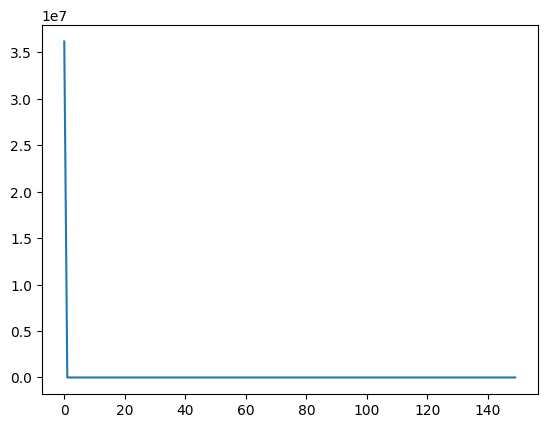

In [334]:
plt.plot(h.history["loss"])

In [335]:
predicted=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [336]:
from sklearn.ensemble import RandomForestClassifier

r=RandomForestClassifier()

r.fit(x_train,y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [337]:
y_predict=r.predict(x_test)

In [338]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict,y_test))

0.8605


In [339]:
predicted

array([[0.23266329],
       [0.23266329],
       [0.23266329],
       ...,
       [0.23266329],
       [0.23266329],
       [0.23266329]], dtype=float32)

In [340]:
loss,accuracy=model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.5147


In [341]:
accuracy

0.7839999794960022